
## 0. Implementing SVM hard and soft margin using CVXPY


For reference, specification of cvxpy atomic functions:
- https://www.cvxpy.org/tutorial/functions/index.html

For a quick recap of SVM:
- https://www.kdnuggets.com/2020/03/machine-learning-algorithm-svm-explained.html
- https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/



<!-- ## If you want to get a copy of the code, you can type the following link in Google Chrome to get the file
# https://colab.research.google.com/drive/13hxhiniX3t9KXhLRa10lCSBwRB6TkFiZ?usp=sharing -->

## 1. Hard Margin SVM


If the training data is linearly separable then we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the “margin”, and the maximum-margin hyperplane is the hyperplane that lies halfway between them.

In [ ]:
# 1. Install dependency:
# !pip install cvxpy
# !pip install scikit-learn

In [1]:
# 2. Load library
import numpy as np
import cvxpy as cp
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Ref: https://ai538393399.wordpress.com/2020/11/25/svm-using-cvxpy/

x has shape (100, 2)
y has shape (100,)


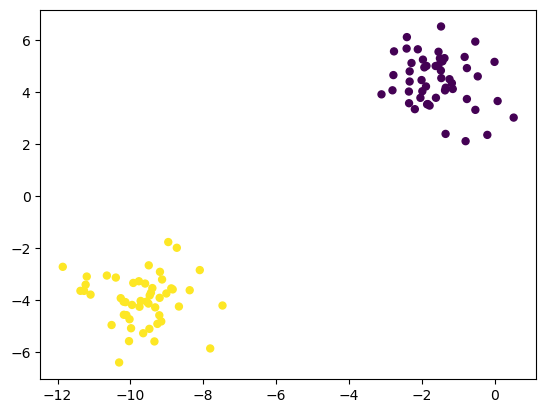

In [3]:
# 3. Generate and plot dataset
np.random.seed(1)
X,y = make_blobs(n_samples=100, centers=2, n_features=2)

# change the label set from [0,1] to [-1,1]
y[y==0] = -1
m,n = np.shape(X)
print('x has shape {}'.format(X.shape))
print('y has shape {}'.format(y.shape))

# Visualize
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=25)
plt.show()

### Instructions:
- See slide 68 in lecture __'Linear Classification and SVM'__, we have an objective as the following:
$$\min_{w, b} \frac{1}{2}||w||_2^2$$
$$S.T. y_i(w^T x_i+b)>=1$$

- Implement a solution for hard margin using a function `cp.Minimize()` which
aims to minimize an objective.

In [ ]:
# 4. Define vars in CVXPY
# todo_1
W = cp.Variable('replace_here') # weight motrix, choose from n or m
# print(W.shape)
b = cp.Variable('replace_here') # gamma term
C = 0.01 # Control/Regularization parameters

# Hard~margin SVM
# objective function is 1/2*||W||_2"2
# You cannot use numpy functions in cvxpy objective function or constraints
# cp.power() con be used to find the power of an expression

# todo_2
objective = 'replace_here'
# constraint y(W'x+b)>=1
# y(W'x+b)-1>= 0
# todo_3
constraints = ['replace_here']


prob = cp.Problem(objective, constraints)
prob.solve()

print("Status of optimization:", prob.status)
print("Optimal value of W: ", W.value)
print("Optimal value of b: ", b.value)


#### Having calculated W and b, you can now classify a new example x, write a function that classifies X

In [ ]:
def classify(x):
    # todo_4a
    result = 'replace_here'
    return np.sign(result)

# todo_4b
x_test = 'replace_here'
classify(x_test)

#### Try to plot your SVM on the graph

In [ ]:
def plot_SVM(w, b, X = X):
    plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=25)
    xp = np.linspace(min(X[:,0]), max(X[:,0]), 100)
    # todo_5
    yp = 'replace here'
    plt.show()

# Visualization
plot_SVM(W, b)

## 2. Soft Margin SVM
### Instruction
- See slide 68 in lecture __'Linear Classification and SVM'__, we have an objective as the following:

$$\min_{w, b} \frac{1}{2}||w||_2^2 + C\sum_i \psi_i$$
$$S.T. y_i(w^T x_i + b) - 1 + \psi_i >= 0$$
$$\psi_i\geq0$$

In [ ]:
# Soft margin SVM
# objective function for soft margin SVM is 0.5w'w + C*sum(Psi)
# cvxpy command for computing the transpose of a matrix is cp.transpose(W)

#todo_6:
Psi = cp.Variable('replace_here') # slack variable, choose from n or m

#todo_7
objective = 'replace_here'

# Constraint y(W'x+b)+Psi-1>=O; Psi>=O
#todo_8
constraints = ['replace_here']

prob = cp.Problem(objective, constraints)
prob.solve()
print("Status of optimization: ", prob.status)
print("Optimal value of W: ", W.value)
print("Optimal value of b: ", b.value)

# print("Constraint_0: ", bconstraints[0])
# print("Constraint_t:", constraints[1]) # second constraint is available far soft-margin svm
# print("Dual value for the first constraint: " , constraints[0].dual_value) # value of the Lagrangian multiplier
# print("Dual value for the second constraint: " , constraints[1].dual_value) # second constraint is available for soft-aorgin svm


Plot the SVM again using `plot_SVM()` function implemented before

In [ ]:
# Visualization

plot_SVM(W,b)

### 3. Sklearn SVC module
Employ a library to train a SVM model.

In [ ]:
from sklearn import svm
# todo_9: Split the data
x_train = 'replace_here'
y_train = 'replace_here'
x_test =  'replace_here'
y_test =  'replace_here'

# todo_11: using sklearn library to train a model using the same training data, ref:https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# c = 10
'replace_here'

# todo_12: test your model
'replace_here'

# todo_13: show your SVC model's parameter, i.e. W and b
'replace_here'

# Visulization
plot_SVM(W, b)

### Questions:
- Compare results with soft and hard margin. Does the soft margin do better when the data is more noisy and harder to separate?
- Try to change the parameter C above and repeat experiment.